In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

from scaling.constants import *
from scaling.laws import *
from scaling.shared import *

'''load all the data'''

model_dir = "exp_data/models" # has all the loss evaluations
cc_mults = [0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0] # multiply each by 20 to get the token multiplier
datasets = ["c4_original", "rpj", "rw_original"]
downstreams = ["avg", "avg_subset"] # the 46-task and 17-task splits
eval_dir = "exp_data/evals" # has all the downstream evaluations
val_dataset = "c4_val" # dataset for loss computation
df = parse_model_jsons(model_dir, cc_mults=cc_mults, datasets=datasets, eval_dir=eval_dir)
print(f"num models: {len(df.index)}")
print(f"fields: {df.columns.tolist()}")

ModuleNotFoundError: No module named 'scaling.constants'

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df


,cc_mult,dataset_name,name,model_name,N,D,flops,color,shape,tok_mult,loss_openlm,loss_upper_openlm,loss_lower_openlm,loss_c4_val,loss_upper_c4_val,loss_lower_c4_val,loss_paloma_c4_en,loss_upper_paloma_c4_en,loss_lower_paloma_c4_en,loss_paloma_dolma_100_programing_languages,loss_upper_paloma_dolma_100_programing_languages,loss_lower_paloma_dolma_100_programing_languages,loss_paloma_falcon-refinedweb,loss_upper_paloma_falcon-refinedweb,loss_lower_paloma_falcon-refinedweb,loss_paloma_ptb,loss_upper_paloma_ptb,loss_lower_paloma_ptb,loss_paloma_redpajama,loss_upper_paloma_redpajama,loss_lower_paloma_redpajama,loss_val_de-en_100,loss_upper_val_de-en_100,loss_lower_val_de-en_100,err_agi_eval_lsat_ar,err_agi_eval_lsat_rc,err_agi_eval_lsat_lr,err_agi_eval_sat_en,err_arc_easy,err_arc_challenge,err_bbq,err_bigbench_conceptual_combinations,err_bigbench_conlang_translation,err_bigbench_cs_algorithms,err_bigbench_dyck_languages,err_bigbench_elementary_math_qa,err_bigbench_misconceptions,err_bigbench_language_identification,err_bigbench_logical_deduction,err_bigbench_novel_concepts,err_bigbench_operators,err_bigbench_repeat_copy_logic,err_bigbench_qa_wikidata,err_bigbench_strange_stories,err_bigbench_strategy_qa,err_bigbench_understanding_fables,err_boolq,err_commonsense_qa,err_copa,err_coqa,err_enterprise_pii_classification,err_hellaswag,err_hellaswag_zeroshot,err_jeopardy,err_lambada_openai,err_logi_qa,err_math_qa,err_mmlu,err_mmlu_zeroshot,err_openbook_qa,err_piqa,err_pubmed_qa_labeled,err_simple_arithmetic_nospaces,err_simple_arithmetic_withspaces,err_siqa,err_squad,err_winogender_mc_female,err_winogender_mc_male,err_winograd,err_winogrande,err_avg,err_avg_subset
71,0.25,rw_original,rw_original-d=96_l=8_h=4-0.25,d=96_l=8_h=4,10569312,52846560,3351310684600320,tab:purple,^,5.0,6.941783,7.093854,6.791097,6.025376,6.028037,6.022767,6.037096,6.090803,5.988464,8.590406,8.617522,8.562980,6.143629,6.214450,6.081405,7.521030,7.593470,7.457946,7.300945,7.433268,7.166740,8.558031,8.600027,8.518204,0.773913,0.723881,0.721569,0.699029,0.736111,0.767065,0.512877,0.718447,1.000000,1.000000,1.000,0.726310,0.506849,0.7498,0.742000,0.81250,0.928571,1.00000,1.000000,0.471264,0.467890,0.740741,0.605810,0.804259,0.52,1.000000,0.543446,0.756622,0.754133,1.000000,1.000000,0.797235,0.751592,0.768831,0.768831,0.748,0.482046,1.000,1.000,1.000,0.515865,1.000000,0.483333,0.533333,0.509158,0.503552,0.753149,0.818189
93,0.25,c4_original,c4_original-d=96_l=8_h=4-0.25,d=96_l=8_h=4,10569312,52846560,3351310684600320,tab:blue,^,5.0,7.255417,7.442781,7.070270,5.974924,5.977423,5.972415,5.988909,6.044720,5.939369,9.052597,9.080538,9.024856,6.304953,6.381006,6.237426,7.805415,7.876810,7.744367,7.646696,7.808547,7.482871,8.463489,8.504479,8.427053,0.773913,0.723881,0.721569,0.699029,0.744529,0.774744,0.504007,0.737864,1.000000,1.000000,1.000,0.731682,0.479452,0.7498,0.748667,0.81250,0.961905,1.00000,1.000000,0.436782,0.464832,0.740741,0.621713,0.804259,0.52,1.000000,0.493667,0.756323,0.755626,1.000000,1.000000,0.797235,0.751592,0.768831,0.768831,0.758,0.484222,1.000,1.000,1.000,0.515865,1.000000,0.450000,0.566667,0.479853,0.490134,0.751929,0.820055
62,0.25,rpj,rpj-d=96_l=8_h=4-0.25,d=96_l=8_h=4,10569312,52846560,3351310684600320,tab:orange,^,5.0,6.319455,6.400031,6.240710,6.123880,6.126478,6.121315,6.112148,6.151627,6.074470,6.378683,6.403687,6.353837,6.270523,6.319730,6.223594,7.565635,7.616242,7.516689,6.178252,6.277682,6.083067,8.341820,8.371902,8.310909,0.773913,0.723881,0.721569,0.699029,0.742424,0.779010,0.520667,0.718447,1.000000,1.000000,1.000,0.731578,0.484018,0.7498,0.750667,0.84375,0.919048,1.00000,1.000000,0.436782,0.472696,0.740741,0.621713,0.804259,0.48,1.000000,0.493667,0.753336,0.754232,1.000000,1.000000,0.797235,0.751592,0.768831,0.768831,0.760,0.500544,1.000,1.000,0.993,0.515865,1.000000,0.400000,0.583333,0.498168,0.483031,0.750775,0.818675
68,0.50,rw_original,rw_original-d=96_l=8_h=4-0.5,d=96_l=8_h=4,10569312,105693120,6702621369200640,tab:purple,^,10.0,6

In [ ]:
import gpytorch
import torch

# Define the GP model
class GPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
    
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Prepare training data
train_x = torch.tensor(df['flops'].values, dtype=torch.float).view(-1, 1)
train_y = torch.tensor(df['loss_openlm'].values, dtype=torch.float)

# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPModel(train_x, train_y, likelihood)

# Training loop
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

training_iter = 30
for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f' % (i + 1, training_iter, loss.item()))
    optimizer.step()


AttributeError: module 'torch' has no attribute 'double'

In [ ]:

'''fit scaling laws with all the defaults in Table 2 for our paper'''
scaling_law_dict = {}

# NOTE: C4 eval used to as the loss evaluation here
for dataset in datasets:
    for downstream in ["avg", "avg_subset"]:
        # Use 1.4B, M=20 run for fitting the top-1 error scaling laws
        ((a, b, alpha_c, E), (k, gamma, epsilon)), (loss_points, error_points) = fit_ds(
            dataset,
            val_dataset,
            downstream,
            model_dir,
            eval_dir,
            cc_mults,
            True,
            True,
        )
        scaling_law_dict[f"train={dataset}-loss={val_dataset}-downstream={downstream}"] = {
            "loss_scaling": (a, b, alpha_c, E),
            "error_scaling": (k, gamma, epsilon),
            "loss_points": loss_points,
            "error_points": error_points,
        }

relative error predicting (open_lm_1b, M=640.0) C4 eval loss: 0.7103%
relative error predicting (open_lm_7b, M=20.0) C4 eval loss: 0.7320%
relative error predicting (open_lm_1b, M=640.0) 17-task split top-1 error: 3.6365%
relative error predicting (open_lm_7b, M=20.0) 17-task split top-1 error: 0.0464%


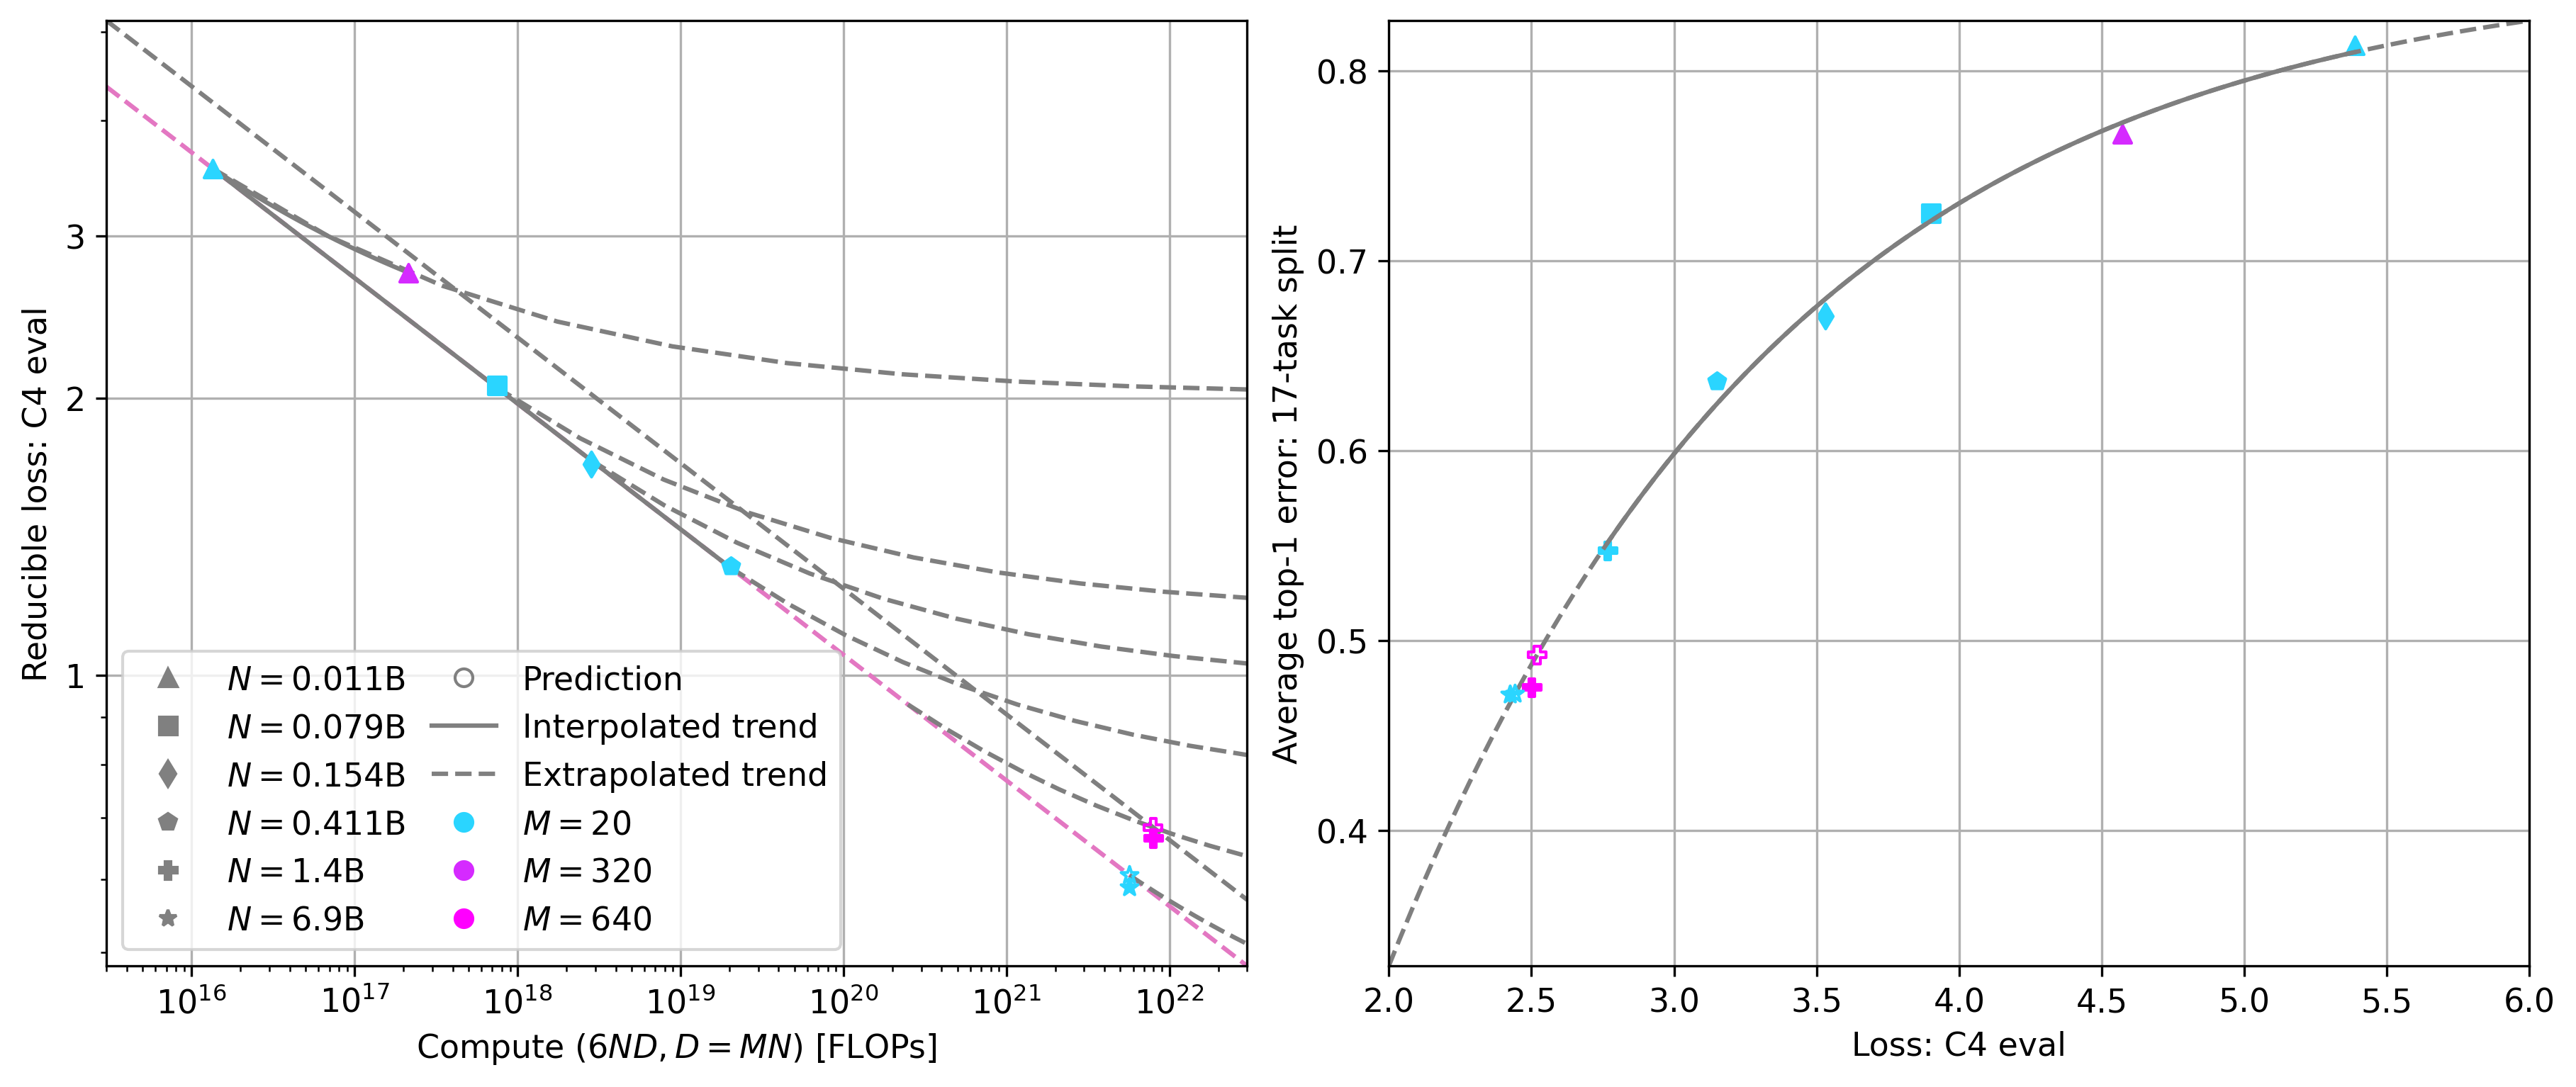

In [ ]:
'''reproduce figure 1'''

mpl.rcParams["figure.dpi"] = 300 
font = {
    "size": 11,
}
mpl.rc("font", **font)

# setup axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), constrained_layout=True)

# axis setup
ax = axes[0]
ax_down = axes[1]
ax.set_ylabel(f"Reducible loss: {VAL_FRIENDLIES[val_dataset]}")
ax.set_xlabel("Compute ($6ND, D=MN$) [FLOPs]")
ax.set_yscale("log")
ax.set_yticks([1.0, 2.0, 3.0])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xscale("log")
ax.grid(which="major", ls="-")
ax.margins(y=0.0, x=0.0)

ax_down.set_ylabel(f"Average top-1 error: {VAL_FRIENDLIES[downstream]}")
ax_down.set_xlabel(f"Loss: {VAL_FRIENDLIES[val_dataset]}")
ax_down.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax_down.grid(which="major", ls="-")
ax_down.margins(y=0.0, x=0.0)




"""
AS: 

"""

# get the redpajama scaling laws for the 17-task split
(a, b, alpha_c, E) = scaling_law_dict["train=rpj-loss=c4_val-downstream=avg_subset"]["loss_scaling"]
(k, gamma, epsilon) = scaling_law_dict["train=rpj-loss=c4_val-downstream=avg_subset"]["error_scaling"]

cmap = plt.get_cmap("cool")
cNorm = colors.LogNorm(vmin=0.5, vmax=32.0)  # values range from M=10 to M=640 token mults
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

# plot gt points for loss scaling
loss_points = scaling_law_dict["train=rpj-loss=c4_val-downstream=avg_subset"]["loss_points"]
for i in range(len(loss_points["flops"])):
    ax.scatter(
        loss_points["flops"][i],
        loss_points["loss"][i] - E,
        marker=loss_points["shapes"][i],
        color=scalarMap.to_rgba(loss_points["mults"][i]/20.),
        zorder=9,
    )

# plot gt target points
target_df = df[(((df["model_name"] == "open_lm_1b") | (df["model_name"] == "open_lm_7b")) & (df["dataset_name"] == "rpj"))]
target_df = target_df[target_df["flops"] > 248761226153164800000] # dont want the 1.4B, M=20 model
target_flops = target_df["flops"].tolist()
target_loss = target_df[f"loss_{val_dataset}"].tolist()
target_shape = target_df["shape"].tolist()
target_mults = target_df["tok_mult"].tolist()
target_names = target_df["model_name"].tolist()
target_error = target_df[f"err_{downstream}"].tolist()

target_loss_dict = {}

for i in range(len(target_flops)):
    target_loss_dict[(target_names[i], target_mults[i]/20)] = target_loss[i]
    ax.scatter(
        target_flops[i],
        target_loss[i] - E,
        marker=target_shape[i],
        color=scalarMap.to_rgba(target_mults[i]/20.),
        zorder=9,
    )

# plot extrapolation for loss scaling
computes = [3e15, 3e17, 3e18, 3e19, 3e20, 3e22]
n = np.sqrt(np.array(computes).astype(float) / (6 * 32.0 * 20)).tolist()
y = (
    powlaw_ours(
        np.array([n, [640.0] * len(computes)]).astype(float),
        *(a, b, alpha_c, E),
    )
    - E
)
ax.plot(computes, y, linestyle="dashed", color="tab:grey")

n = np.sqrt(np.array(computes).astype(float) / (6 * 1.0 * 20)).tolist()
y = (
    powlaw_ours(
        np.array([n, [20.0] * len(computes)]).astype(float),
        *(a, b, alpha_c, E),
    )
    - E
)
ax.plot(computes, y, linestyle="dashed", color="tab:pink")

for N in sorted(PARAM_SHAPES.keys()):
    start_compute = (N**2) * 20. * 6
    end_compute = 3e22

    ms = []
    for c in np.linspace(np.log10(start_compute), np.log10(end_compute), 10):
        m = np.power(10, c) / ((N**2) * 6)
        ms.append(m)

    xs = ((N**2) * np.array(ms) * 6).tolist()
    ys = (
        powlaw_ours(np.array([[N for _ in range(len(xs))], ms]).astype(float), *(a, b, alpha_c, E))
        - E
    )

    ax.plot(
        xs, ys, color="tab:grey", linestyle="dashed"
    )  
    

# plot interpolation for loss scaling
y = (
    powlaw_ours(
        np.array([[min(loss_points["params"]), max(loss_points["params"])], [20.0, 20.0]]).astype(float),
        *(a, b, alpha_c, E),
    )
    - E
)
ax.plot([min(loss_points["flops"]), max(loss_points["flops"])], y, color="tab:grey")

ms_11m = np.linspace(1.0, 16.0, 100) * 20
ns_11m = [NAME_PARAMS["d=96_l=8_h=4"] for _ in range(len(ms_11m))]
ys_11m = powlaw_ours(np.array([ns_11m, ms_11m.tolist()]), *(a, b, alpha_c, E)).astype(float) - E
xs_11m = [6 * m * 10569312**2 for m in ms_11m]
ax.plot(xs_11m, ys_11m, color="tab:grey")

# plot predictions at 6.9B, 138B tokens and 1.4B, 900B tokens
for name, m in [("open_lm_1b", 32.), ("open_lm_7b", 1.)]:
    N = NAME_PARAMS[name]
    compute = (N**2) * 20 * m * 6
    loss_pred = powlaw_ours(np.array([[N], [20 * m]]), *(a, b, alpha_c, E))
    ax.scatter(
        [compute],
        [loss_pred - E],
        zorder=9,
        marker=PARAM_SHAPES[N],
        facecolors='none',
        edgecolors=scalarMap.to_rgba(m),
    )
    
    gt_loss = target_loss_dict[(name, m)]
    print(f"relative error predicting ({name}, M={m*20}) {VAL_FRIENDLIES[val_dataset]} loss: {abs(loss_pred - gt_loss).item() / gt_loss:.4%}")

# plot gt points for error scaling
error_points = scaling_law_dict["train=rpj-loss=c4_val-downstream=avg_subset"]["error_points"]
for i in range(len(error_points["flops"])):
    ax_down.scatter(
        error_points["loss"][i],
        error_points["error"][i],
        marker=error_points["shapes"][i],
        color=scalarMap.to_rgba(error_points["mults"][i]/20.)
    )



"""
AS: This is where he plots the prediction (transparent) and the error from actual to prediction (% printed)
"""

# target error plotting
target_error_dict = {}

for i in range(len(target_flops)):
    target_error_dict[(target_names[i], target_mults[i]/20)] = target_error[i]
    ax_down.scatter(
        target_loss[i],
        target_error[i],
        marker=target_shape[i],
        color=scalarMap.to_rgba(target_mults[i]/20.),
        zorder=9,
    )

x_range = np.linspace(2.0, 6.0, 100)
ax_down.plot(x_range, decay_ours(x_range, *(k, gamma, epsilon)) , linestyle="dashed", color="tab:grey")

x_range = np.linspace(min(error_points["loss"]), max(error_points["loss"]), 100)
ax_down.plot(x_range, decay_ours(x_range, *(k, gamma, epsilon)), color="tab:grey")

# plot predictions at 6.9B, 138B tokens and 1.4B, 900B tokens
for name, m in [("open_lm_1b", 32.), ("open_lm_7b", 1.)]:
    N = NAME_PARAMS[name]
    compute = (N**2) * 20 * m * 6
    loss_pred = powlaw_ours(np.array([[N], [20 * m]]), *(a, b, alpha_c, E))
    error_pred = decay_ours(loss_pred, *(k, gamma, epsilon))
    
    ax_down.scatter(
        [loss_pred],
        [error_pred],
        zorder=9,
        marker=PARAM_SHAPES[N],
        facecolors='none',
        edgecolors=scalarMap.to_rgba(m),
    )
    
    gt_error = target_error_dict[(name, m)]
    print(f"relative error predicting ({name}, M={m*20}) {VAL_FRIENDLIES[downstream]} top-1 error: {abs(error_pred - gt_error).item() / gt_error:.4%}")

# label=label,
# color=color,
# marker=marker,
# linestyle=linestyle,
labels = []
for name in MODEL_FRINDLIES:
    labels.append(
        ("$N = $" + MODEL_FRINDLIES[name], "grey", MODEL_SHAPES[name], "", "full")
    )

labels.extend(
    [
        ("Prediction", "grey", "o", "", "none"),
        ("Interpolated trend", "grey", "", "-", "full"),
        ("Extrapolated trend", "grey", "", "--", "full"),
        ("$M = 20$", scalarMap.to_rgba(1.0), "o", "", "full"),
        ("$M = 320$", scalarMap.to_rgba(16.0), "o", "", "full"),
        ("$M = 640$", scalarMap.to_rgba(32.0), "o", "", "full"),
    ]
)

legend_helper(ax, labels)

In [ ]:
'''your fun scaling law exploration here!'''
pass